<a href="https://colab.research.google.com/github/SHIVANSH-CHANDRA-TRIPATHI/Machine_Learning-Open_World_Classification_Problem/blob/master/EVM(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/EVM/

/content/drive/My Drive/EVM


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import models,layers
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


## **Separating Different Digits of Mnist**

In [0]:
x0=x1=x2=x3=x4=x5=x6=x7=x8=x9=[]
for i in range(60000):
    if(y_train[i]==0):
     x0 = np.append(x0,x_train[i])
    elif(y_train[i]==1):
     x1 = np.append(x1,x_train[i])
    elif(y_train[i]==2):
     x2 = np.append(x2,x_train[i])
    elif(y_train[i]==3):
     x3 = np.append(x3,x_train[i])
    elif(y_train[i]==4):
     x4 = np.append(x4,x_train[i])
    elif(y_train[i]==5):
     x5 = np.append(x5,x_train[i])
    elif(y_train[i]==6):
     x6 = np.append(x6,x_train[i])
    elif(y_train[i]==7):
     x7 = np.append(x7,x_train[i])
    elif(y_train[i]==8):
     x8 = np.append(x8,x_train[i])
    elif(y_train[i]==9):
     x9 = np.append(x9,x_train[i])

In [0]:
x0 = x0.reshape(x0.shape[0]//784,28,28,1)
x1 = x1.reshape(x1.shape[0]//784,28,28,1)
x2 = x2.reshape(x2.shape[0]//784,28,28,1)
x3 = x3.reshape(x3.shape[0]//784,28,28,1)
x4 = x4.reshape(x4.shape[0]//784,28,28,1)
x5 = x5.reshape(x5.shape[0]//784,28,28,1)
x6 = x6.reshape(x6.shape[0]//784,28,28,1)
x7 = x7.reshape(x7.shape[0]//784,28,28,1)
x8 = x8.reshape(x8.shape[0]//784,28,28,1)
x9 = x9.reshape(x9.shape[0]//784,28,28,1)

In [0]:
np.save("x0.npy",x0)
np.save("x1.npy",x1)
np.save("x2.npy",x2)
np.save("x3.npy",x3)
np.save("x4.npy",x4)
np.save("x5.npy",x5)
np.save("x6.npy",x6)
np.save("x7.npy",x7)
np.save("x8.npy",x8)
np.save("x9.npy",x9)

In [0]:
x0 = np.load("x0.npy")
x1 = np.load("x1.npy")
x2 = np.load("x2.npy")
x3 = np.load("x3.npy")
x4 = np.load("x4.npy")
x5 = np.load("x5.npy")
x6 = np.load("x6.npy")
x7 = np.load("x7.npy")
x8 = np.load("x8.npy")
x9 = np.load("x9.npy")

In [0]:
x0.shape

(5421, 28, 28, 1)

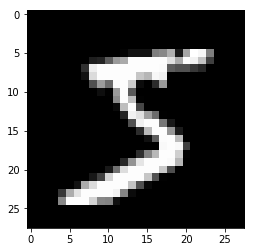

In [0]:
plt.imshow(x5[0].reshape(28,28),cmap='gray')

In [0]:
x0 = x0[:5421].astype(float)/255.0
x1 = x1[:5421].astype(float)/255.0
x2 = x2[:5421].astype(float)/255.0
x3 = x3[:5421].astype(float)/255.0
x4 = x4[:5421].astype(float)/255.0
x5 = x5[:5421].astype(float)/255.0
x6 = x6[:5421].astype(float)/255.0
x7 = x7[:5421].astype(float)/255.0
x8 = x8[:5421].astype(float)/255.0
x9 = x9[:5421].astype(float)/255.0


In [0]:
x_norm = []
for i in range(10):
  x_norm = np.append(x_norm, vars()['x'+str(i)])

In [0]:
np.save("x_norm.npy",x_norm)

In [0]:
x_norm = x_norm.reshape(x_norm.shape[0]//784,28,28,1)

In [0]:
x_norm.shape

(54210, 28, 28, 1)

In [0]:
pip install evm

  Stored in directory: /root/.cache/pip/wheels/9d/d3/fb/342ec9af3d8b3d0d7159081e8205a70404d3d324a402d911d0
  Stored in directory: /root/.cache/pip/wheels/68/59/1a/9f120c43e08929ccf17ed7aa1d38b86b55f82787ceecddb7ae
Successfully built evm libmr


In [0]:
import EVM, numpy, scipy


In [0]:
evm5 = EVM.EVM(tailsize=100000, cover_threshold = 0.7, distance_function=scipy.spatial.distance.euclidean)

In [0]:
evm5.train(positives = x4 , negatives = numpy.concatenate((x7,x9)))

In [0]:
import pickle
#evm2 tailsize 100
#evm3 tailsize 1000
#evm4 tailsize 10000
#evm5 tailsize 100000

In [0]:
pickle.dump(evm5, open('evm5', 'wb'))

NameError: ignored

In [0]:
evm1 = pickle.load(open('evm1', 'rb'))

In [0]:
xt0=xt1=xt2=xt3=xt4=xt5=xt6=xt7=xt8=xt9=[]
for i in range(10000):
  vars()['xt'+str(y_test[i])] = np.append(vars()['xt'+str(y_test[i])],x_test[i])

In [0]:
print(xt0.shape, xt1.shape,xt2.shape,xt3.shape,xt4.shape,xt5.shape,xt6.shape,xt7.shape,xt8.shape,xt9.shape)

(892, 784) (892, 784) (892, 784) (892, 784) (892, 784) (892, 784) (892, 784) (892, 784) (892, 784) (892, 784)


In [0]:
xt1.shape

(892, 28, 28, 1)

In [0]:
for i in range(10):
  vars()['xt'+str(i)] = (vars()['xt'+str(i)].reshape(vars()['xt'+str(i)].shape[0]//784,28,28,1))[:892]/255

In [0]:
for i in range(10):
 np.save("xt"+str(i)+".npy",vars()['xt'+str(i)])

In [0]:
x_normt = []
for i in range(10):
  x_normt = np.append(x_normt, vars()['xt'+str(i)])

In [0]:
np.save("x_normt.npy",x_normt)

In [0]:
x_normt = x_normt.reshape(8920,28,28,1)

In [0]:
for i in range(10):
 vars()['xt'+str(i)]= np.load("xt"+str(i)+".npy")

In [0]:
xt2.shape

(892, 784)

In [0]:
pt0=pt1=pt2=pt3=pt4=pt5=pt6=pt7=pt8=pt9=[]
for i in range(10):
  x = vars()['xt'+str(i)]/255
  p=[]
  for j in x:
    probability, evm_index= evm1.max_probabilities([j])
    p = np.append(p,probability)
  p = p.reshape(892,p.shape[0]//892)
  vars()['pt'+str(i)]=p


KeyboardInterrupt: ignored

In [0]:
for i in range(10):
 np.save("pt"+str(i)+".npy",vars()['pt'+str(i)])

In [0]:
for i in range(10):
  p=vars()['pt'+str(i)]
  #plt.plot(p,color='red',marker='.', linestyle='dashed',linewidth =0.1, markersize=2)
  plt.hist(p,color='orange',edgecolor = 'white',bins=50)
  plt.title("EVM-(Mnist)")
  plt.xlabel("Images-\""+str(i)+"\"")
  plt.ylabel("Probabilities of belonging to Images-\"4\"")
  #plt.text(2500,-0.08, 'EVM trained using Images-"4" as positive and Images-"7" and Images-"9" as negatives',horizontalalignment='center',verticalalignment='center')
  plt.savefig("Graphs/Graphsnotflatten/"+'xth'+str(i)+".png")
  plt.show()
  #xxt was for tailsize = 100
  #xxxt was for tailsize = 1000
  #xxxxt was for tailsize = 10000
  #xxxxxt was for tailsize = 100000

In [0]:
p0=p1=p2=p3=p4=p5=p6=p7=p8=p9=[]
for i in range(10):
  x = vars()['x'+str(i)]/255
  p=[]
  for j in x:
    probability, evm_index= evm2.max_probabilities([j])
    p = np.append(p,probability)
  vars()['p'+str(i)]=p


In [0]:
np.array(p0).shape

(0,)

In [0]:
for i in range(10):
 np.save("p"+str(i)+".npy",vars()['p'+str(i)])

In [0]:
for i in range(10):
  p=vars()['p'+str(i)]
  plt.plot(p,color='red',marker='.', linestyle='dashed',linewidth =0.1, markersize=2)
  plt.title("EVM-(Mnist)")
  plt.xlabel("Images-\""+str(i)+"\"")
  plt.ylabel("Probabilities of belonging to Images-\"4\"")
  #plt.text(2500,-0.08, 'EVM trained using Images-"4" as positive and Images-"7" and Images-"9" as negatives',horizontalalignment='center',verticalalignment='center')
  plt.savefig("Graphs/"+'xx'+str(i)+".png")
  plt.show()
  #xxt was for tailsize = 100
  #xxxt was for tailsize = 1000
  #xxxxt was for tailsize = 10000
  #xxxxxt was for tailsize = 100000

In [0]:
y_testinds = y_test.argsort()
y_test = y_test[y_testinds[::-1]]

In [0]:
y_test = np.negative(y_test,dtype = 'int')

In [0]:
y_test

array([-9, -9, -9, ...,  0,  0,  0])

In [0]:
#Sorting x_test based on y_test
#arr1inds = arr1.argsort()
#sorted_arr1 = arr1[arr1inds[::-1]]
x_test = x_test[y_testinds[::-1]]

In [0]:
x_test = x_test.reshape(10000,784)

In [0]:
x_test = x_test/255

In [0]:
p=[]
for i in x_test:
  probability, evm_index= evm0.max_probabilities([i])
  p = np.append(p,probability)


In [0]:
p_test = p

In [0]:
np.save("p_test.npy",p_test)

In [0]:
p_test.shape

(10000,)

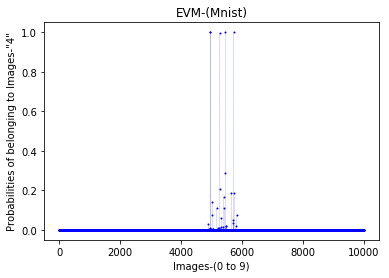

In [0]:
plt.plot(p_test,color='blue',marker='.', linestyle='dashed',linewidth =0.1, markersize=2)
plt.title("EVM-(Mnist)")
plt.xlabel("Images-(0 to 9)")
plt.ylabel("Probabilities of belonging to Images-\"4\"")
#plt.text(2500,-0.08, 'EVM trained using Images-"4" as positive and Images-"7" and Images-"9" as negatives',horizontalalignment='center',verticalalignment='center')
plt.savefig("Graphs/p_test.png")
plt.show()

# **Training and Testing EVM after flattening with CNN**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
def flatten_layer(x_train,y_train):
  batch_size = 128
  num_classes = 10
  epochs = 12
  img_rows, img_cols = 28, 28
  if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
  else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = keras.utils.to_categorical(y_train, num_classes)
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

  model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
  return model

In [0]:
K.image_data_format()

'channels_last'

In [0]:
model_train = flatten_layer(x_train, y_train)
model_train.save('model_train.h5')

W0701 14:41:17.315023 140658452100992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 14:41:17.353697 140658452100992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 14:41:17.360975 140658452100992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 14:41:17.407341 140658452100992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0701 14:41:17.413038 140658452100992 deprecation_wrapp

Epoch 1/12
60000/60000 [==============================] - 14s 240us/step - loss: 0.2573 - acc: 0.9205
Epoch 2/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0856 - acc: 0.9740
Epoch 3/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0638 - acc: 0.9811
Epoch 4/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0523 - acc: 0.9837
Epoch 5/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0462 - acc: 0.9858
Epoch 6/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0394 - acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0365 - acc: 0.9889
Epoch 8/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0328 - acc: 0.9898
Epoch 9/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0317 - acc: 0.9899
Epoch 10/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0288 - 

In [0]:
model_train = load_model('model_train.h5')

W0706 06:48:03.920775 139702201845632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0706 06:48:03.931602 139702201845632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


KeyboardInterrupt: ignored

In [0]:
x_normf = np.load("x_normf.npy")

FileNotFoundError: ignored

In [0]:
for i in range(10):
  vars()['xf'+str(i)]=x_normf[5421*i:(5421*(i+1)-1)]
  np.save("xf"+str(i)+".npy", vars()['xf'+str(i)]

In [0]:
for i in range(10):
  

In [0]:
pip install evm

In [0]:
import EVM, numpy, scipy
evmf1 = EVM.EVM(tailsize=10, cover_threshold = 0.7, distance_function=scipy.spatial.distance.euclidean)

In [0]:
evmf1.train(positives = xf4 , negatives = numpy.concatenate((xf7,xf9)))

In [0]:
import pickle
#evmf1 tailsize 10
#evmf2 tailsize 100
#evmf3 tailsize 1000
#evmf4 tailsize 10000
#evmf5 tailsize 100000

In [0]:
pickle.dump(evmf1, open('evmf1', 'wb'))

In [0]:
evmf1 = pickle.load(open('evm2', 'rb'))

In [0]:
pf=[]
for i in x_normf:
  probability, evm_index= evmf1.max_probabilities([i])
  pf = np.append(pf,probability)
np.save("pf.npy",pf)


In [0]:
for i in range(10):
 vars()['xt'+str(i)]= np.load("xt"+str(i)+".npy")
 vars()['xt'+str(i)] = vars()['xt'+str(i)].reshape(vars()['xt'+str(i)].shape[0],28,28)

In [0]:
x_normt = []
for i in range(10):
  x_normt = np.append(x_normt, vars()['xt'+str(i)])

In [0]:
x_normt = x_normt.reshape(x_normt.shape[0]//784,28,28)

In [0]:
np.save("x_normt.npy",x_normt)

In [0]:
#x_normtf = np.load("x_normtf.npy")
layer_outputs = [layer.output for layer in model_train.layers[:8]]
activation_model = models.Model(inputs=model_train.input, outputs=layer_outputs)
x=[]
for i in x_normt:
  activations = activation_model.predict(i.reshape(1,28,28,1))
  x=np.append(x,activations[4])
x = x.reshape(x_normt.shape[0],x.shape[0]//x_normt.shape[0])
x_normtf = x #f -> flatten
np.save("x_normtf.npy",x_normtf)

In [0]:
ptf=[]
for i in x_normtf:
  probability, evm_index= evmf1.max_probabilities([i])
  ptf = np.append(ptf,probability)
np.save("ptf.npy",ptf)


# **Testing and Training using Adversarial Autoencoder**

In [0]:
import numpy as np
import keras as ke
import pandas as pd
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype(float)
x_train /= 255.0

In [0]:
x0.shape

(5421, 28, 28, 1)

In [0]:
def build_model_enc():
    model = ke.models.Sequential()
    model.add(ke.layers.Conv2D(32, (5,5), padding="same", activation="relu", input_shape=(28, 28, 1)))
    model.add(ke.layers.Conv2D(64, (5,5), strides=(2,2), activation="relu", padding="same"))
    model.add(ke.layers.Conv2D(128, (5,5), strides=(2,2), activation="relu", padding="same"))
    model.add(ke.layers.Flatten())
    model.add(ke.layers.Dense(4, activation="linear"))

    return model

def build_model_dec():
    model = ke.models.Sequential()
    model.add(ke.layers.Dense(6272, input_shape=(4,)))
    model.add(ke.layers.Reshape((7, 7, 128)))
    model.add(ke.layers.Conv2D(64, (5,5), activation="relu", padding="same"))
    model.add(ke.layers.UpSampling2D())
    model.add(ke.layers.Conv2D(32, (5,5), activation="relu", padding="same"))
    model.add(ke.layers.UpSampling2D())
    model.add(ke.layers.Conv2D(1, (5,5), activation="sigmoid", padding="same"))

    return model

def build_model_disc():
    model = ke.models.Sequential()
    model.add(ke.layers.Dense(32, activation="relu", input_shape=(4,)))
    model.add(ke.layers.Dense(32, activation="relu"))
    model.add(ke.layers.Dense(1, activation="sigmoid"))
    return model
  
def build_model_aae():
    model_enc = build_model_enc()
    model_dec = build_model_dec()
    model_disc = build_model_disc()
    
    model_ae = ke.models.Sequential()
    model_ae.add(model_enc)
    model_ae.add(model_dec)
    
    model_enc_disc = ke.models.Sequential()
    model_enc_disc.add(model_enc)
    model_enc_disc.add(model_disc)
    
    return model_enc, model_dec, model_disc, model_ae, model_enc_disc

model_enc, model_dec, model_disc, model_ae, model_enc_disc = build_model_aae()

model_enc.summary()
model_dec.summary()
model_disc.summary()
model_ae.summary()
model_enc_disc.summary()

model_disc.compile(optimizer=ke.optimizers.Adam(lr=1e-4), loss="binary_crossentropy")
model_enc_disc.compile(optimizer=ke.optimizers.Adam(lr=1e-4), loss="binary_crossentropy")
model_ae.compile(optimizer=ke.optimizers.Adam(lr=1e-3), loss="binary_crossentropy")

W0722 08:02:59.651538 140099073099648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 08:02:59.691274 140099073099648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 08:02:59.697906 140099073099648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 08:02:59.810437 140099073099648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0722 08:02

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 25092     
Total params: 282,116
Trainable params: 282,116
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dens

In [0]:
def imagegrid(dec, epochnumber):        
        fig = plt.figure(figsize=[20, 20])
        
        for i in range(-5, 5):
            for j in range(-5,5):
                topred = np.array((i*0.5,j*0.5))
                topred = topred.reshape((1, 2))
                img = dec.predict(topred)
                img = img.reshape((28, 28))
                ax = fig.add_subplot(10, 10, (i+5)*10+j+5+1)
                ax.set_axis_off()
                ax.imshow(img, cmap="gray")
        
        fig.savefig(str(epochnumber)+".png")
        plt.show()
        plt.close(fig)
        
def settrainable(model, toset):
    for layer in model.layers:
        layer.trainable = toset
    model.trainable = toset

In [0]:
x_train = np.append(x0,np.append(x8,x3))

In [0]:
x_train = x_train.reshape(x_train.shape[0]//784,28,28,1)

In [0]:
batchsize=50
#Set Number of Epochs to 10-20 or higher.
for epochnumber in range(50):
    np.random.shuffle(x_train)
    
    for i in range(int(len(x_train) / batchsize)):
        settrainable(model_ae, True)
        settrainable(model_enc, True)
        settrainable(model_dec, True)
        
        batch = x_train[i*batchsize:i*batchsize+batchsize]
        model_ae.train_on_batch(batch, batch)
        
        settrainable(model_disc, True)
        batchpred = model_enc.predict(batch)
        fakepred = np.random.standard_normal((batchsize,4))
        discbatch_x = np.concatenate([batchpred, fakepred])
        discbatch_y = np.concatenate([np.zeros(batchsize), np.ones(batchsize)])
        model_disc.train_on_batch(discbatch_x, discbatch_y)
        
        settrainable(model_enc_disc, True)
        settrainable(model_enc, True)
        settrainable(model_disc, False)
        model_enc_disc.train_on_batch(batch, np.ones(batchsize))
    
    print ("Reconstruction Loss:", model_ae.evaluate(x_train, x_train, verbose=0))
    print ("Adverserial Loss:", model_enc_disc.evaluate(x_train, np.ones(len(x_train)), verbose=0))
    
    
   # imagegrid(model_dec, epochnumber)

W0722 08:03:50.137666 140099073099648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Reconstruction Loss: 0.18503802265070068
Adverserial Loss: 0.05120265971353146
Reconstruction Loss: 0.1789127736532372
Adverserial Loss: 0.05897991836422859
Reconstruction Loss: 0.17520319306178997
Adverserial Loss: 0.05287024424910318
Reconstruction Loss: 0.17345071570746304
Adverserial Loss: 0.05023861914361849
Reconstruction Loss: 0.17084949969519683
Adverserial Loss: 0.048426199911999146
Reconstruction Loss: 0.168961041631759
Adverserial Loss: 0.048016445267440894
Reconstruction Loss: 0.16620295293721254
Adverserial Loss: 0.0459272689172579
Reconstruction Loss: 0.16500215346171965
Adverserial Loss: 0.04078688796224581
Reconstruction Loss: 0.1636128884736795
Adverserial Loss: 0.04445647015321931
Reconstruction Loss: 0.16231759896392292
Adverserial Loss: 0.04107423517276922
Reconstruction Loss: 0.16245078698945048
Adverserial Loss: 0.04359507751026046
Reconstruction Loss: 0.16207516529566246
Adverserial Loss: 0.04073528027443592
Reconstruction Loss: 0.16130520538167234
Adverserial Lo

In [0]:
enc = ke.models.Sequential()
enc.add(ke.layers.Conv2D(32, (5,5), padding="same", activation="relu", input_shape=(28, 28, 1),weights = model_enc.layers[0].get_weights()))
enc.add(ke.layers.Conv2D(64, (5,5), strides=(2,2), activation="relu", padding="same",weights = model_enc.layers[1].get_weights()))
enc.add(ke.layers.Conv2D(128, (5,5), strides=(2,2), activation="relu", padding="same",weights = model_enc.layers[2].get_weights()))
enc.add(ke.layers.Flatten(weights = model_enc.layers[3].get_weights()))
enc.add(ke.layers.Dense(4, activation="linear",weights = model_enc.layers[4].get_weights()))

In [0]:
enc.save("enc083.h5")

In [0]:
enc = load_model("enc16.h5")

W0708 05:15:42.794146 140665454229376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 05:15:42.842335 140665454229376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 05:15:42.943841 140665454229376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0708 05:15:42.945059 140665454229376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0708 05:15:42.945831 140665454229376 depre

In [0]:
x_norm = []
for i in range(10):
  x_norm = np.append(x_norm, vars()['x'+str(i)])
 

In [0]:
x_norm = x_norm.reshape(x_norm.shape[0]//784,28,28,1)

In [0]:
np.save("x_norm.npy",x_norm)

In [0]:
x_norm = np.load("x_norm.npy")
x=[]
for i in x_norm:
  x = np.append(x,enc.predict(i.reshape(1,28,28,1))) 

In [0]:
x_normn083 = x.reshape(54210,4)
np.save("x_normn083.npy",x_normn083)

In [0]:
x_norme = np.load("x_norme.npy")

In [0]:
x_normn4.shape

(54210, 4)

In [0]:
pip install evm

  Stored in directory: /root/.cache/pip/wheels/9d/d3/fb/342ec9af3d8b3d0d7159081e8205a70404d3d324a402d911d0
  Stored in directory: /root/.cache/pip/wheels/68/59/1a/9f120c43e08929ccf17ed7aa1d38b86b55f82787ceecddb7ae
Successfully built evm libmr


In [0]:
import EVM, numpy, scipy

In [0]:
evm083 = EVM.EVM(tailsize=10, cover_threshold = 0.7, distance_function=scipy.spatial.distance.euclidean)

In [0]:
evm083.train(positives = x_normn083[0:5421], negatives = numpy.concatenate((x_normn083[43368:48789], x_normn083[16263:21684])))

In [0]:
import pickle

In [0]:
pickle.dump(evm083, open('evm083', 'wb'))

In [0]:
evmn1 = pickle.load(open('evmn1', 'rb'))

In [0]:
#evme encoded dimension 2

In [0]:
p083 = []
for i in x_normn083:
  probability, evm_index= evm083.max_probabilities([i])
  p083 = np.append(p083,probability)
np.save("p083.npy",p083)
#evme8 means encoded dimension is 8

In [0]:
x_normt = np.load("x_normt.npy").reshape(8920,28,28,1)
x=[]
for i in x_normt:
  x = np.append(x,enc.predict(i.reshape(1,28,28,1))) 
x_normnt083 = x.reshape(8920,4)

In [0]:
np.save("x_normnt083.npy",x_normnt083)

In [0]:
x_normet8 = np.load("x_normet8.npy")

In [0]:
x_normnt1 = np.load("x_normnt1.npy")
pnt1 = []
for i in x_normnt1:
  probability, evm_index= evmn1.max_probabilities([i])
  pnt1 = np.append(pnt1,probability)
np.save("pnt1.npy",pnt1)


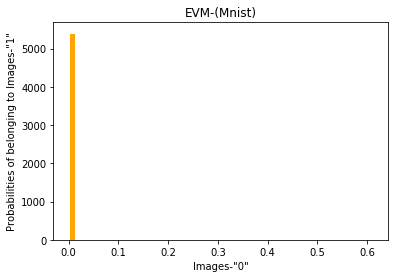

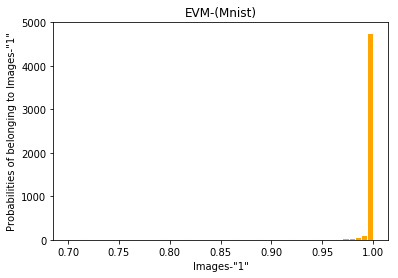

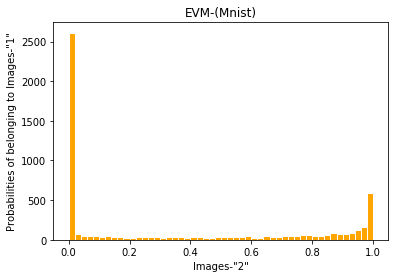

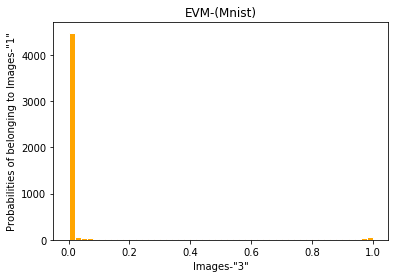

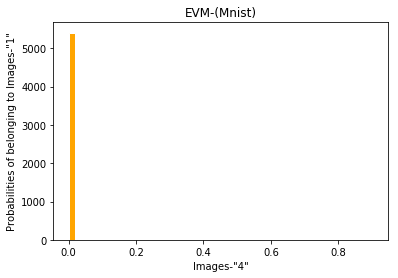

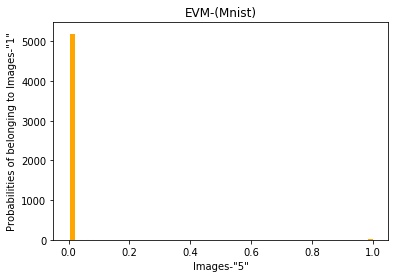

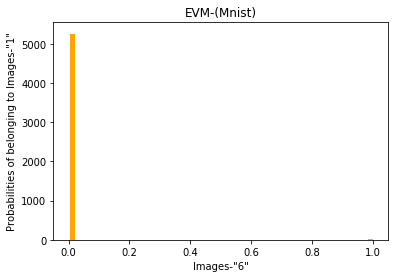

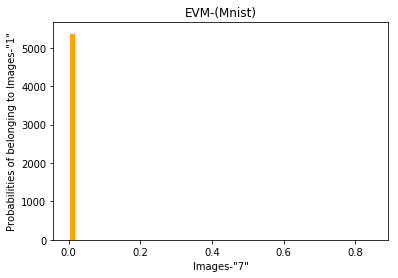

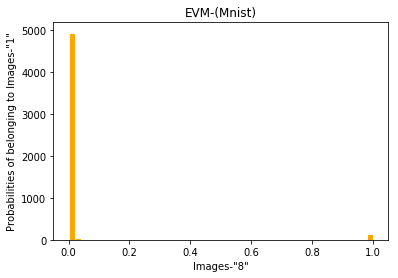

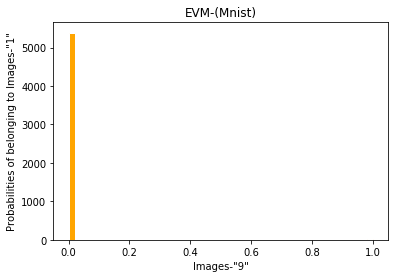

In [0]:
pn1 = np.load("pn1.npy")
for i in range(10):
  #plt.plot(p,color='red',marker='.', linestyle='dashed',linewidth =0.1, markersize=2)
  plt.hist(pn1[5421*i:5421*(i+1)],color='orange',edgecolor = 'white',bins=50)
  plt.title("EVM-(Mnist)")
  plt.xlabel("Images-\""+str(i)+"\"")
  plt.ylabel("Probabilities of belonging to Images-\"1\"")
  #plt.text(2500,-0.08, 'EVM trained using Images-"4" as positive and Images-"7" and Images-"9" as negatives',horizontalalignment='center',verticalalignment='center')
  plt.savefig("Graphs/Graphsencoder/"+'xn1'+str(i)+".png")
  plt.show()
  #xet8 means encoder dimension is 8
  #xxt was for tailsize = 100
  #xxxt was for tailsize = 1000
  #xxxxt was for tailsize = 10000
  #xxxxxt was for tailsize = 100000

In [0]:
x_normt.shape

(8920, 28, 28, 1)

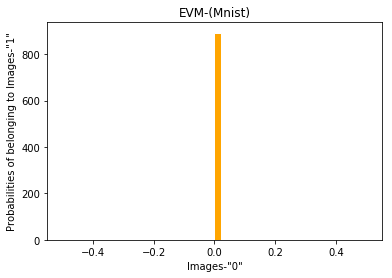

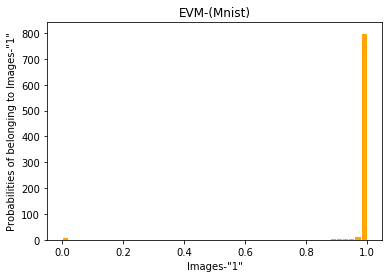

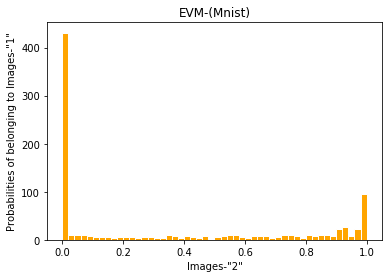

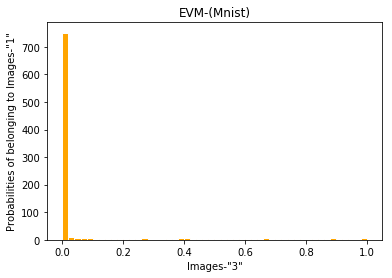

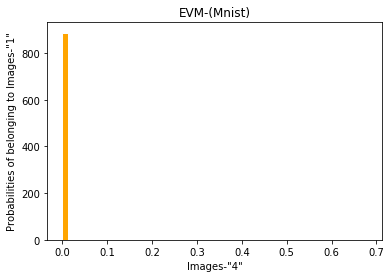

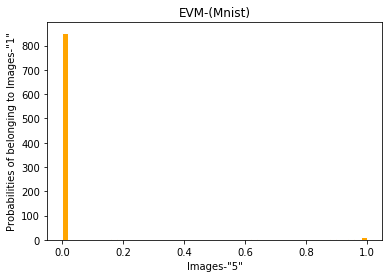

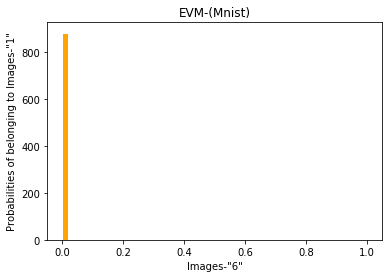

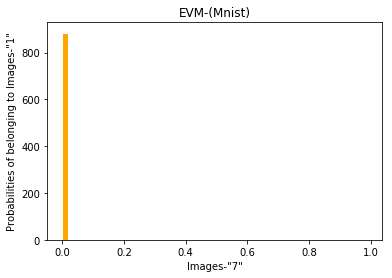

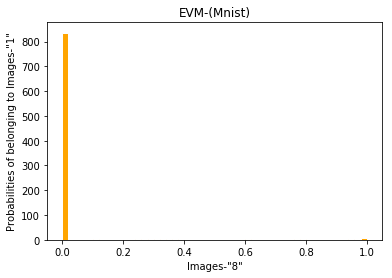

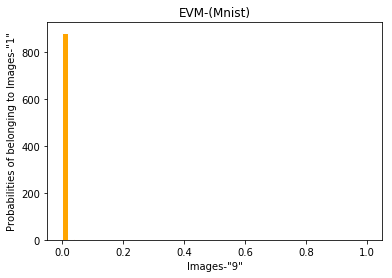

In [0]:
pnt1 = np.load("pnt1.npy")
for i in range(10):
  #plt.plot(p,color='red',marker='.', linestyle='dashed',linewidth =0.1, markersize=2)
  plt.hist(pnt1[892*i:892*(i+1)],color='orange',edgecolor = 'white',bins=50)
  plt.title("EVM-(Mnist)")
  plt.xlabel("Images-\""+str(i)+"\"")
  plt.ylabel("Probabilities of belonging to Images-\"1\"")
  #plt.text(2500,-0.08, 'EVM trained using Images-"4" as positive and Images-"7" and Images-"9" as negatives',horizontalalignment='center',verticalalignment='center')
  plt.savefig("Graphs/Graphsencoder/"+'xnt1'+str(i)+".png")
  plt.show()
  #xet8 means encoder dimension is 8
  #xxt was for tailsize = 100
  #xxxt was for tailsize = 1000
  #xxxxt was for tailsize = 10000
  #xxxxxt was for tailsize = 100000

In [0]:
layer_outputs = [layer.output for layer in model0.layers[:8]]
activation_model = models.Model(inputs=model0.input, outputs=layer_outputs)

In [0]:
xx0, model0 = flatten_layer(x0,np.full(x0.shape[0],1,dtype='uint8'))
xx1, model1 = flatten_layer(x1,np.full(x1.shape[0],1,dtype='uint8'))
xx2, model2 = flatten_layer(x2,np.full(x2.shape[0],1,dtype='uint8'))
xx3, model3 = flatten_layer(x3,np.full(x3.shape[0],1,dtype='uint8'))
xx4, model4 = flatten_layer(x4,np.full(x4.shape[0],1,dtype='uint8'))
xx5, model5 = flatten_layer(x5,np.full(x5.shape[0],1,dtype='uint8'))
xx6, model6 = flatten_layer(x6,np.full(x6.shape[0],1,dtype='uint8'))
xx7, model7 = flatten_layer(x7,np.full(x7.shape[0],1,dtype='uint8'))
xx8, model8 = flatten_layer(x8,np.full(x8.shape[0],1,dtype='uint8'))
xx9, model9 = flatten_layer(x9,np.full(x9.shape[0],1,dtype='uint8'))

In [0]:
np.save("xx0.npy",xx0)
np.save("xx1.npy",xx1)
np.save("xx2.npy",xx2)
np.save("xx3.npy",xx3)
np.save("xx4.npy",xx4)
np.save("xx5.npy",xx5)
np.save("xx6.npy",xx6)
np.save("xx7.npy",xx7)
np.save("xx8.npy",xx8)
np.save("xx9.npy",xx9)

In [0]:
xx0 = np.load("xx0.npy")
xx1 = np.load("xx1.npy")
xx2 = np.load("xx2.npy")
xx3 = np.load("xx3.npy")
xx4 = np.load("xx4.npy")
xx5 = np.load("xx5.npy")
xx6 = np.load("xx6.npy")
xx7 = np.load("xx7.npy")
xx8 = np.load("xx8.npy")
xx9 = np.load("xx9.npy")

# **Saving and Loading Model using Pickle**

---



# New Section

In [0]:
import pickle

In [0]:
pickle.dump(evm, open('evm', 'wb'))

In [0]:
loaded_model = pickle.load(open('evm', 'rb'))

In [0]:
pip install evm

  Stored in directory: /root/.cache/pip/wheels/9d/d3/fb/342ec9af3d8b3d0d7159081e8205a70404d3d324a402d911d0
  Stored in directory: /root/.cache/pip/wheels/68/59/1a/9f120c43e08929ccf17ed7aa1d38b86b55f82787ceecddb7ae
Successfully built evm libmr


In [0]:
import EVM, numpy, scipy
evm = EVM.EVM(tailsize=10, cover_threshold = 0.7, distance_function=scipy.spatial.distance.euclidean)

In [0]:
evm.train(positives = x_train[:98], negatives = numpy.concatenate((x_train[98:])))

ValueError: ignored

In [0]:
import pickle

In [0]:
pickle.dump(evm, open('evm', 'wb'))

In [0]:
evm = pickle.load(open('evm', 'rb'))

In [0]:
probabilities0=indexes0=[]
for i in range(xx0.shape[0]):
  p,i = evm.max_probabilities([xx0[i]])
  probabilities0 = np.append(probabilities0,p)
  index0 = np.append(index0,i)

In [0]:
probabilities1=indexes1=[]
for i in range(xx1.shape[0]):
  p,i = evm.max_probabilities([xx1[i]])
  probabilities1 = np.append(probabilities1,p)
  index1 = np.append(index1,i)

In [0]:
probabilities2=indexes2=[]
for i in range(xx2.shape[0]):
  p,i = evm.max_probabilities([xx2[i]])
  probabilities2 = np.append(probabilities2,p)
  index2 = np.append(index2,i)

In [0]:
probabilities3=indexes3=[]
for i in range(xx3.shape[0]):
  p,i = evm.max_probabilities([xx3[i]])
  probabilities3 = np.append(probabilities3,p)
  index3 = np.append(index3,i)

In [0]:
probabilities4=indexes4=[]
for i in range(xx4.shape[0]):
  p,i = evm.max_probabilities([xx4[i]])
  probabilities4 = np.append(probabilities4,p)
  index4 = np.append(index4,i)

In [0]:
probabilities5=indexes5=[]
for i in range(xx5.shape[0]):
  p,i = evm.max_probabilities([xx5[i]])
  probabilities5 = np.append(probabilities5,p)
  index5 = np.append(index5,i)

In [0]:
probabilities6=indexes6=[]
for i in range(xx6.shape[0]):
  p,i = evm.max_probabilities([xx6[i]])
  probabilities6 = np.append(probabilities6,p)
  index6 = np.append(index6,i)

In [0]:
probabilities6=indexes6=[]
for i in range(xx6.shape[0]):
  p,i = evm.max_probabilities([xx6[i]])
  probabilities6 = np.append(probabilities6,p)
  index6 = np.append(index6,i)

In [0]:
probabilities0=indexes0=[]
for i in range(xx0.shape[0]):
  p,i = evm.max_probabilities([xx0[i]])
  probabilities0 = np.append(probabilities0,p)
  index0 = np.append(index0,i)

In [0]:
probabilities0=indexes0=[]
for i in range(xx0.shape[0]):
  p,i = evm.max_probabilities([xx0[i]])
  probabilities0 = np.append(probabilities0,p)
  index0 = np.append(index0,i)

In [0]:
for i in range(xx0.shape[0]):
  probabilities, indexes = mevm.max_probabilities([xx0[i]])
  print(probabilities,'\n')  
for i in range(xx1.shape[0]):
  probabilities, indexes = mevm.max_probabilities([xx1[i]])
  print(probabilities,'\n')  
for i in range(xx2.shape[0]):
  probabilities, indexes = mevm.max_probabilities([xx2[i]])
  print(probabilities,'\n')
for i in range(xx3.shape[0]):
  probabilities, indexes = mevm.max_probabilities([xx3[i]])
  print(probabilities,'\n')
for i in range(xx4.shape[0]):
  probabilities, indexes = mevm.max_probabilities([xx4[i]])
  print(probabilities,'\n')

In [0]:
import pickle

In [0]:
pickle.dump(mevm, open('mevm', 'wb'))

In [0]:
mevm = pickle.load(open('mevm', 'rb'))

In [0]:
xt0=xt1=xt2=xt3=xt4=xt5=xt6=xt7=xt8=xt9=[]
for i in range(10000):
    if(y_test[i]==0):
     xt0 = np.append(xt0,x_test[i])
    elif(y_test[i]==1):
     xt1 = np.append(xt1,x_test[i])
    elif(y_test[i]==2):
     xt2 = np.append(xt2,x_test[i])
    elif(y_test[i]==3):
     xt3 = np.append(xt3,x_test[i])
    elif(y_test[i]==4):
     xt4 = np.append(xt4,x_test[i])
    elif(y_test[i]==5):
     xt5 = np.append(xt5,x_test[i])
    elif(y_test[i]==6):
     xt6 = np.append(xt6,x_test[i])
    elif(y_test[i]==7):
     xt7 = np.append(xt7,x_test[i])
    elif(y_test[i]==8):
     xt8 = np.append(xt8,x_test[i])
    elif(y_test[i]==9):
     xt9 = np.append(xt9,x_test[i])

In [0]:
xt0 = xt0.reshape(xt0.shape[0]//784,28,28,1)
xt1 = xt1.reshape(xt1.shape[0]//784,28,28,1)
xt2 = xt2.reshape(xt2.shape[0]//784,28,28,1)
xt3 = xt3.reshape(xt3.shape[0]//784,28,28,1)
xt4 = xt4.reshape(xt4.shape[0]//784,28,28,1)
xt5 = xt5.reshape(xt5.shape[0]//784,28,28,1)
xt6 = xt6.reshape(xt6.shape[0]//784,28,28,1)
xt7 = xt7.reshape(xt7.shape[0]//784,28,28,1)
xt8 = xt8.reshape(xt8.shape[0]//784,28,28,1)
xt9 = xt9.reshape(xt9.shape[0]//784,28,28,1)

In [0]:
xt0

NameError: ignored

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
#flatten layer with Image Augmentation
def flatten_layert(x_train,y_train):
  batch_size = 128
  num_classes = 1
  epochs = 50
  img_rows, img_cols = 28, 28
  if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
  else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

  x_train = x_train.astype('float32')
  x_train /= 255
  datagen.fit(x_train)
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

  model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs)
  
  layer_outputs = [layer.output for layer in model.layers[:8]]
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
  x=[]
  for i in range(x_train.shape[0]):
    activations = activation_model.predict(x_train[i].reshape(1,28,28,1))
    x=np.append(x,activations[4])
  x = x.reshape(x_train.shape[0],x.shape[0]//x_train.shape[0])
  return x, model

In [0]:
xxt0, modelt0 = flatten_layert(xt0,np.full(xt0.shape[0],1,dtype='uint8'))
xxt1, modelt1 = flatten_layert(xt1,np.full(xt1.shape[0],1,dtype='uint8'))
xxt2, modelt2 = flatten_layert(xt2,np.full(xt2.shape[0],1,dtype='uint8'))
xxt3, modelt3 = flatten_layert(xt3,np.full(xt3.shape[0],1,dtype='uint8'))
xxt4, modelt4 = flatten_layert(xt4,np.full(xt4.shape[0],1,dtype='uint8'))
xxt5, modelt5 = flatten_layert(xt5,np.full(xt5.shape[0],1,dtype='uint8'))
xxt6, modelt6 = flatten_layert(xt6,np.full(xt6.shape[0],1,dtype='uint8'))
xxt7, modelt7 = flatten_layert(xt7,np.full(xt7.shape[0],1,dtype='uint8'))
xxt8, modelt8 = flatten_layert(xt8,np.full(xt8.shape[0],1,dtype='uint8'))
xxt9, modelt9 = flatten_layert(xt9,np.full(xt9.shape[0],1,dtype='uint8'))

In [0]:
probability, evm_index = evm.max_probabilities([xxt1[345]])
print(probability)
probability, evm_index = evm.max_probabilities([xx8[345]])
print(probability)
probability, evm_index = evm.max_probabilities([xx9[345]])
print(probability)
probability, evm_index = evm.max_probabilities([xxt8[345]])
print(probability)
probability, evm_index = evm.max_probabilities([xxt9[345]])
print(probability)
probability, evm_index = evm.max_probabilities([xxt3[345]])
print(probability)

In [0]:
evm.train(positives = x0, negatives = numpy.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9)))

In [0]:
x=[]
for i in range(10000):
  if y_test[i]==1:
    probability, evm_index = evm.max_probabilities([x_test[i].reshape(1,784)])
    print(probability[0]," ",i)
    x = np.append(x,[probability[0],i])
   

0.9993020320734837   2
0.9998738676314837   5
0.9227641268682205   14
0.9998399231781466   29
0.9830717464655606   31
0.9999999999999998   37
0.9948849745108884   39
0.9998369743139767   40
0.1911053294436139   46
0.9989021979577373   57
0.9999999653533811   74
0.6822735477905475   89
0.7146680178213487   94
0.0   96
0.43439211958618873   107
0.9998579715118561   135
0.9422964701208941   137
0.9999764864944592   143
0.9865266972183567   145
0.999999914287155   154
0.999999998735187   168
0.9992039115421635   176
0.9999999997228396   178
0.9982459355694774   180
0.9685805817092668   189
0.463792379162162   190
0.9998444509200457   191
0.9999999942528198   196
0.9990597097384514   202
0.9948653283314357   203
0.9996828327420152   204
0.7103574838643976   224
0.999761507785471   228
0.9999998113856662   239
0.2905921193747292   251
0.9999276465630497   265
0.999995512686973   267
0.9999951410190605   272
0.9996354520304909   276
0.9995400743362082   279
0.9999897698745001   288
0.99999999